# minst

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
random.seed(1)
torch.manual_seed(1)

In [3]:
batch_size = 100
epochs = 15

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data', train=False, transform=transforms.ToTensor(), download=True)

In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [6]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10, bias=True)
        
    def forward(self, x):
        return self.linear(x)

In [7]:
model = MnistModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [8]:
for epoch in range(1, epochs+1):
    avg_loss = 0
    total_batch = len(data_loader)
    
    for x_train, y_train in data_loader:
        x_train = x_train.view(-1, 28*28)
        
        prediction = model(x_train)
        
        loss = F.cross_entropy(prediction, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss / total_batch
        
    print('epoch: {:04d}, loss: {:.4f}'.format(epoch, avg_loss))
print('Learning finished')        

epoch: 0001, loss: 0.5323
epoch: 0002, loss: 0.3588
epoch: 0003, loss: 0.3309
epoch: 0004, loss: 0.3165
epoch: 0005, loss: 0.3069
epoch: 0006, loss: 0.3000
epoch: 0007, loss: 0.2950
epoch: 0008, loss: 0.2908
epoch: 0009, loss: 0.2872
epoch: 0010, loss: 0.2844
epoch: 0011, loss: 0.2820
epoch: 0012, loss: 0.2796
epoch: 0013, loss: 0.2778
epoch: 0014, loss: 0.2758
epoch: 0015, loss: 0.2744
Learning finished


0.8841999769210815
Label:  8
Prediction:  8


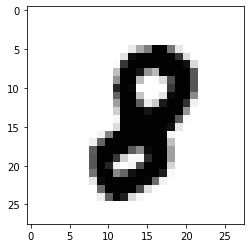

In [40]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(-1, 28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = model(x_test)
    correct = torch.argmax(prediction, 1) == y_test
    accuracy = correct.float().mean()
    print(accuracy.item())
    
    r = random.randint(0, len(mnist_test) -1)
    x_random_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float()
    y_random_data = mnist_test.test_labels[r:r+1]
    
    print('Label: ', y_random_data.item())
    single_prediction = model(x_random_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()